## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

## Importing Data

In [3]:
#Reading Dataset
df = pd.read_csv("TelcoChurn.csv")

In [4]:
df.shape 

(7043, 21)

In [5]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Setting Display options to ensure feature name visibility

In [7]:
pd.set_option('display.max_columns',None) 

## Drop ID Feature from the dataset

In [8]:
df=df.drop(['customerID'],axis=1)

## Label the Churn feature to 1/0

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
df['target'] = df['Churn'].replace(('Yes','No'),(1,0))

In [11]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,target
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0


In [12]:
df.drop("Churn", axis = 1, inplace = True)

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## Defining Target and Independent Features

In [14]:
Y = df[['target']]
X = df.drop(['target'], axis = 1)

In [15]:
Y.mean() #Churn Rate

target    0.26537
dtype: float64

## Split features into Numerical and Categorical

In [16]:
num= X.select_dtypes(include='number')
char= X.select_dtypes(include='object')

In [17]:
num.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [18]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [19]:
num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [20]:
char.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

SeniorCitizen feature may have significant effect on target variable.. Gender may not..

In [21]:
dum = pd.concat([char.gender,Y], axis = 1)

In [22]:
dum.groupby("gender").value_counts()

gender  target
Female  0         2549
        1          939
Male    0         2625
        1          930
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='target'>

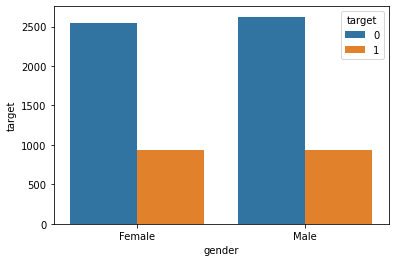

In [23]:
plt.plot()
sns.barplot(x="gender",y="target",data=dum,hue="target", estimator=len)

In [24]:
num.tenure.mean()

32.37114865824223

## Dropping the indicator features from num to build a separate DF

In [25]:
ind=num[['SeniorCitizen']]
num=num.drop(['SeniorCitizen'],axis=1)

## Outlier Analysis of Numerical Features

In [26]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0,0.95,0.99]).T

,count,mean,std,min,0%,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,95%,99%,max
tenure,7043.0,32.371149,24.559481,0.00,0.00,1.000,1.00,2.00,9.00,12.00,20.00,29.00,40.00,55.00,65.000,69.00,72.000,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,18.25,19.200,19.65,20.05,35.50,45.85,58.83,70.35,79.10,89.85,98.550,102.60,107.400,114.729,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,18.80,19.871,49.07,83.47,398.55,548.40,939.78,1394.55,2043.71,3786.60,5195.485,5973.69,6921.025,8039.256,8684.80


## Capping and Flooring of Outlier

In [27]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.95))
    return(x)

In [28]:
num=num.apply(lambda x : outlier_cap(x))

In [29]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,85%,90%,99%,max
tenure,7043.0,32.372710,24.557454,1.00,1.00,1.000,2.00,9.00,29.00,55.00,65.000,69.00,72.000,72.000
MonthlyCharges,7043.0,64.566357,29.747902,19.65,19.65,19.650,20.05,35.50,70.35,89.85,98.550,102.60,107.400,107.400
TotalCharges,7043.0,2246.127358,2185.556691,49.07,49.07,49.088,83.47,398.55,1394.55,3786.60,5195.485,5973.69,6921.025,6921.025


## Missig Vale Analysis

In [30]:
num.isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

###### Since the data does not contain any missing values Imputation Processes are not required

## Feature Selection - Numerical Features

## Part 1 : Remove Features with 0 Variance

In [31]:
num

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,49.070
1,34.0,56.95,1889.500
2,2.0,53.85,108.150
3,45.0,42.30,1840.750
4,2.0,70.70,151.650
...,...,...,...
7038,24.0,84.80,1990.500
7039,72.0,103.20,6921.025
7040,11.0,29.60,346.450
7041,4.0,74.40,306.600


In [32]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)
vt.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = vt.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [33]:
num.equals(num_1)

True

In [34]:
num_1

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,49.070
1,34.0,56.95,1889.500
2,2.0,53.85,108.150
3,45.0,42.30,1840.750
4,2.0,70.70,151.650
...,...,...,...
7038,24.0,84.80,1990.500
7039,72.0,103.20,6921.025
7040,11.0,29.60,346.450
7041,4.0,74.40,306.600


## Part 2 - Bi Variate Analysis (Feature Discretization)

In [35]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1), columns=num_1.columns).add_suffix('_Rank')
num_binned

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0
...,...,...,...
7038,4.0,6.0,5.0
7039,9.0,9.0,9.0
7040,2.0,2.0,2.0
7041,1.0,5.0,2.0


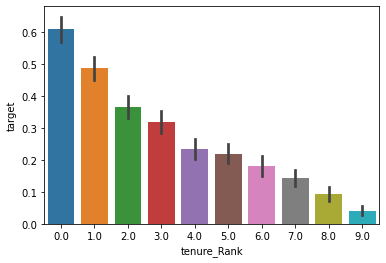

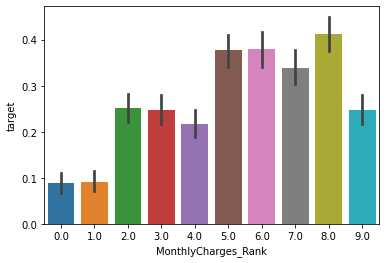

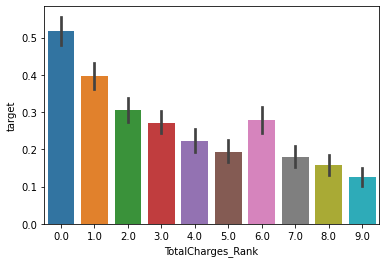

In [36]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [37]:
# All features from num_2 will get selected due to good discrimination
select_features_df_num=num_1

In [38]:
num_1.shape


(7043, 3)

## Feature Selection - Categorical Features

## Part 1 - Bi Variate Analysis

In [39]:
dum

,gender,target
0,Female,0
1,Male,0
2,Male,1
3,Male,0
4,Female,1
...,...,...
7038,Male,0
7039,Female,0
7040,Female,0
7041,Male,1


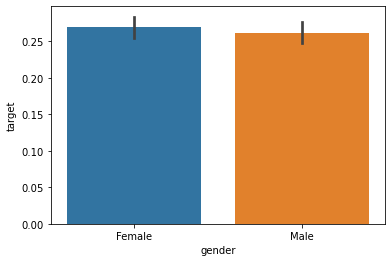

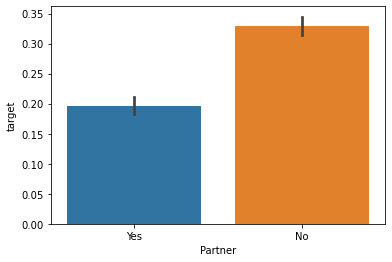

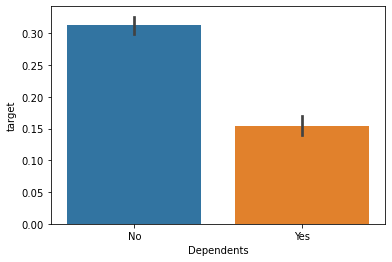

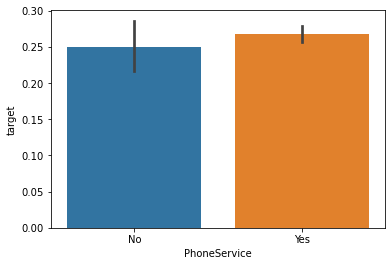

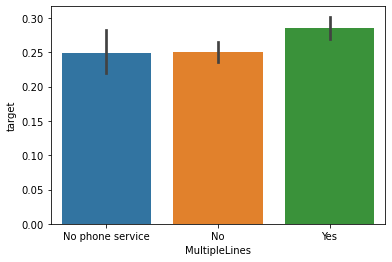

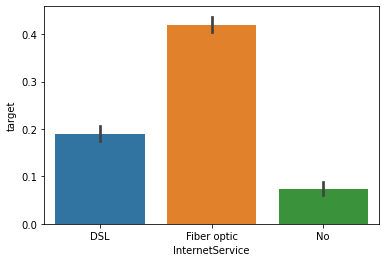

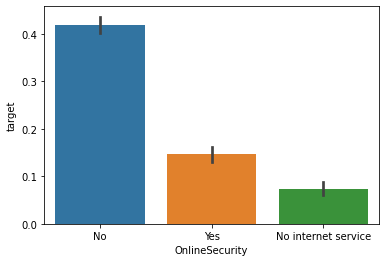

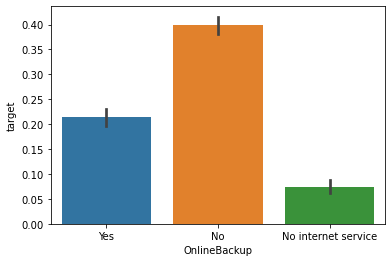

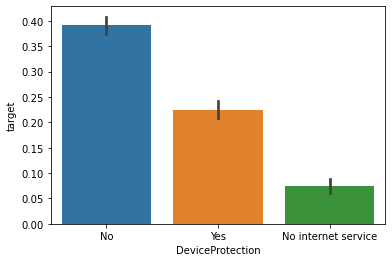

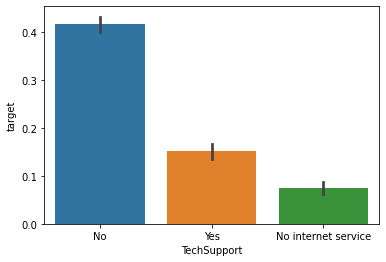

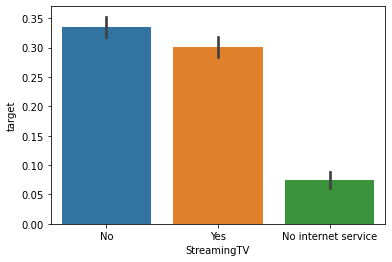

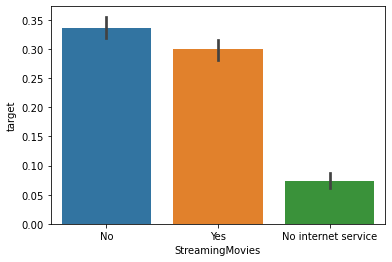

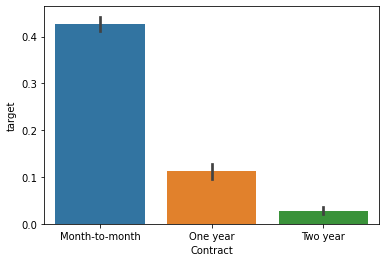

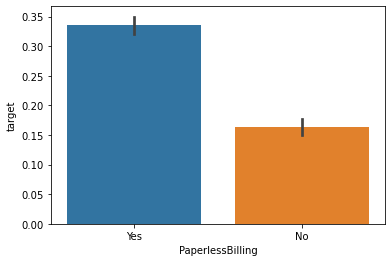

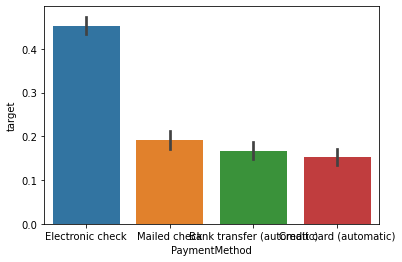

In [40]:
Char_Y = pd.concat([char, Y], axis = 1, join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col,y='target', data=Char_Y, estimator = mean)
plt.show()

In [41]:
char.drop(['gender','PhoneService','MultipleLines'],axis=1,inplace=True)

In [42]:
char.shape

(7043, 12)

In [43]:
char_dum = pd.get_dummies(char, drop_first = True)

In [44]:
char_dum.shape

(7043, 22)

In [45]:
X_char_dum = char_dum
X_char_dum

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [46]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
#X_char_dum.columns[selector.get_support()]
dfScores = pd.DataFrame(data= selector.scores_, index=X_char_dum.columns, columns = ["Score"])
dfScores.sort_values(by=["Score"], ascending=False,inplace=True)

In [47]:
colus = dfScores.head(20).index

In [48]:
colus

Index(['Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_One year',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'Dependents_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'Partner_Yes', 'PaymentMethod_Mailed check', 'OnlineBackup_Yes',
       'DeviceProtection_Yes'],
      dtype='object')

In [49]:
select_features_df_ = X_char_dum.loc[:,colus]

In [50]:
select_features_df_

,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,OnlineSecurity_Yes,TechSupport_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),Partner_Yes,PaymentMethod_Mailed check,OnlineBackup_Yes,DeviceProtection_Yes
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0,1
7039,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,1
7040,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0
7041,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0


In [51]:
dfScores.tail(20)

,Score
InternetService_Fiber optic,374.476216
InternetService_No,286.520193
OnlineSecurity_No internet service,286.520193
OnlineBackup_No internet service,286.520193
DeviceProtection_No internet service,286.520193
TechSupport_No internet service,286.520193
StreamingTV_No internet service,286.520193
StreamingMovies_No internet service,286.520193
Contract_One year,176.123171
OnlineSecurity_Yes,147.295858


In [52]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [53]:
select_features_df_char

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1
7039,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0
7040,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## Feature Selection - Numerical Indicator Features

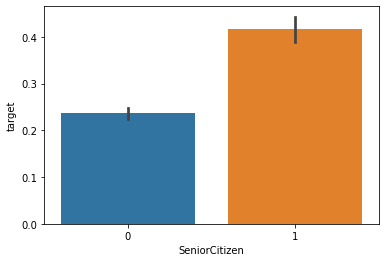

In [54]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_ind_merged, estimator=mean )
plt.show()

## Creating the Master Feature Set for Model Development

In [55]:
select_features_df_ind=ind

In [56]:
X_all=pd.concat([select_features_df_char,num_1,select_features_df_ind],axis=1,join="inner")

In [57]:
X_all

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1.0,29.85,49.070,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,34.0,56.95,1889.500,0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2.0,53.85,108.150,0
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,45.0,42.30,1840.750,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2.0,70.70,151.650,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,24.0,84.80,1990.500,0
7039,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,72.0,103.20,6921.025,0
7040,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,11.0,29.60,346.450,0
7041,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,74.40,306.600,1


In [58]:
Y['target']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: target, Length: 7043, dtype: int64

In [59]:
Y['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

# Train test split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [62]:
print(y_train.mean())
print(y_test.mean())

target    0.266126
dtype: float64
target    0.263606
dtype: float64


In [63]:
# Building a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [64]:
log_reg.coef_[0]

array([-4.05814161e-02, -1.99331920e-01,  4.79509721e-01, -1.62385383e-01,
       -1.62385383e-01, -5.36866243e-01, -1.62385383e-01, -2.56532208e-01,
       -1.62385383e-01, -1.44245027e-01, -1.62385383e-01, -5.08428260e-01,
       -1.62385383e-01, -1.62385383e-01, -3.13154246e-01, -3.55114054e-01,
        4.27960452e-01, -1.86769312e-01,  4.32049112e-01, -3.30634327e-01,
       -6.47901147e-02,  3.20850297e-03,  3.80956653e-04,  2.66909256e-01])

In [65]:
coeff_df = pd.DataFrame(columns=["features","coeff"])
coeff_df["features"] = X_all.columns
coeff_df["coeff"] = log_reg.coef_[0]

In [66]:
coeff_df

,features,coeff
0,Partner_Yes,-0.040581
1,Dependents_Yes,-0.199332
2,InternetService_Fiber optic,0.479510
3,InternetService_No,-0.162385
4,OnlineSecurity_No internet service,-0.162385
5,OnlineSecurity_Yes,-0.536866
6,OnlineBackup_No internet service,-0.162385
7,OnlineBackup_Yes,-0.256532
8,DeviceProtection_No internet service,-0.162385
9,DeviceProtection_Yes,-0.144245


In [67]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [68]:
from sklearn.model_selection import GridSearchCV
param_dict = {'max_depth': [3, 4, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dict,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 50}


In [69]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=0)

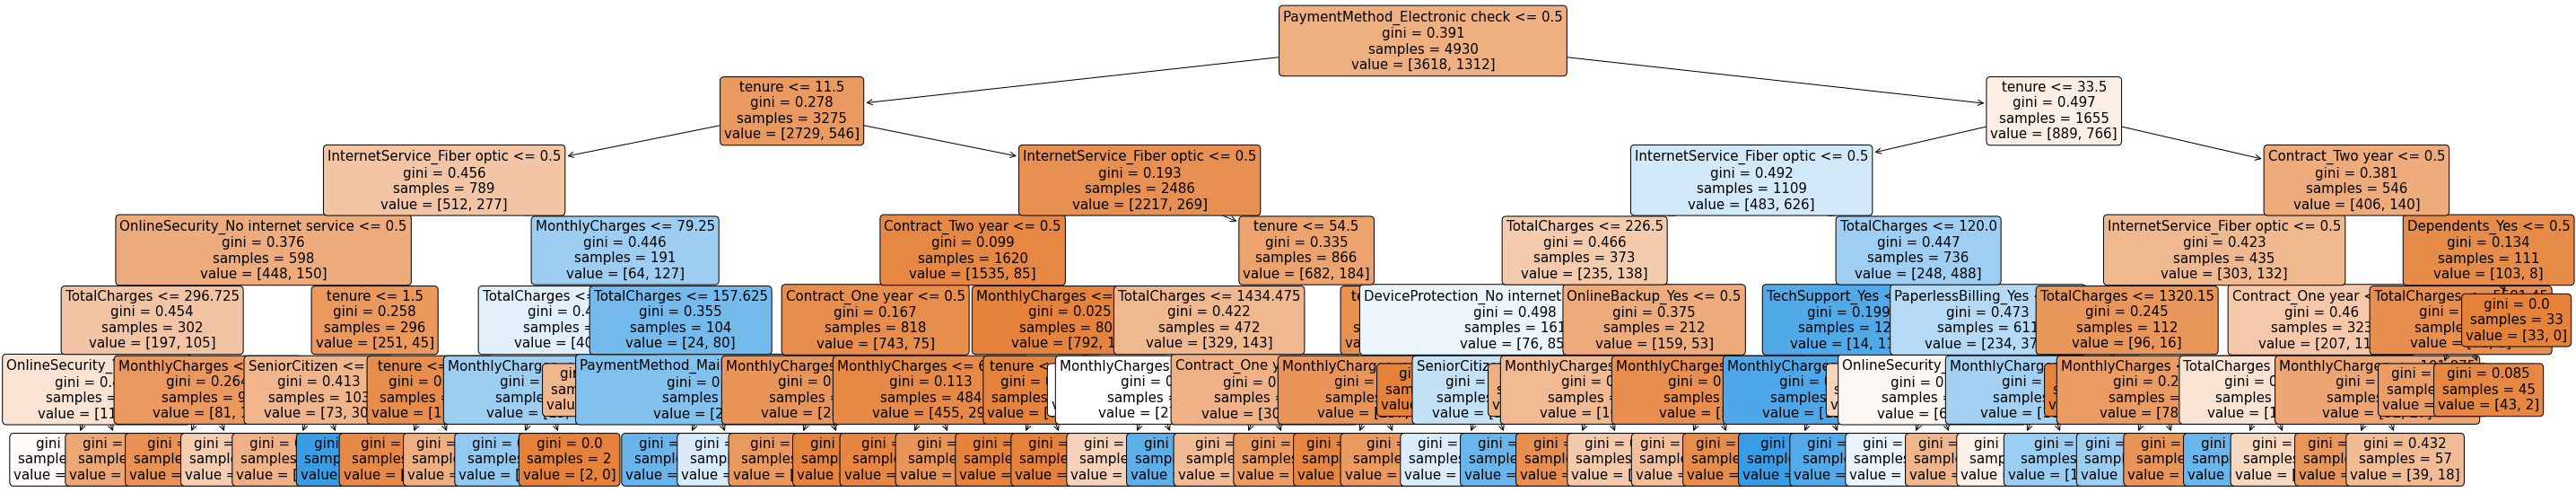

In [70]:
from sklearn import tree
#import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [71]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [72]:
feature_imp = np.array(rf.feature_importances_)
feature_imp

array([0.00542376, 0.0052295 , 0.11612702, 0.02876343, 0.01910078,
       0.03840722, 0.01273162, 0.01103705, 0.01271454, 0.00505746,
       0.0242902 , 0.02853285, 0.01408072, 0.01710032, 0.03662175,
       0.07668299, 0.01378807, 0.00521232, 0.0884089 , 0.00627441,
       0.20203157, 0.08395119, 0.14211082, 0.00632151])

In [73]:
fi = pd.DataFrame(feature_imp, index=X_train.columns, columns=['importance']) #.sort_values('importance',ascending=False)

In [74]:
fi = fi.sort_values(by=["importance"], ascending=False)
fi

,importance
tenure,0.202032
TotalCharges,0.142111
InternetService_Fiber optic,0.116127
PaymentMethod_Electronic check,0.088409
MonthlyCharges,0.083951
Contract_Two year,0.076683
OnlineSecurity_Yes,0.038407
Contract_One year,0.036622
InternetService_No,0.028763
TechSupport_Yes,0.028533


In [75]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [76]:
feature_imp_gbc = np.array(gbc.feature_importances_)
feature_imp_gbc

array([4.55649696e-03, 4.26379979e-03, 1.28262783e-01, 4.87279384e-04,
       2.94728041e-03, 1.67853692e-02, 2.36476558e-03, 9.39295119e-03,
       3.08887903e-03, 4.14880710e-03, 2.73570427e-03, 1.46400003e-02,
       2.95361522e-03, 1.71042006e-04, 3.35991609e-02, 3.50858139e-02,
       1.97438737e-02, 4.28913003e-03, 1.35038242e-01, 3.74024484e-03,
       2.13507480e-01, 1.78986799e-01, 1.66517413e-01, 1.26930702e-02])

In [77]:
fi_gbc = pd.DataFrame(feature_imp_gbc, index=X_train.columns, columns=['importance']) #.sort_values('importance',ascending=False)

In [78]:
fi_gbc = fi_gbc.sort_values(by=["importance"], ascending=False)
fi_gbc

,importance
tenure,0.213507
MonthlyCharges,0.178987
TotalCharges,0.166517
PaymentMethod_Electronic check,0.135038
InternetService_Fiber optic,0.128263
Contract_Two year,0.035086
Contract_One year,0.033599
PaperlessBilling_Yes,0.019744
OnlineSecurity_Yes,0.016785
TechSupport_Yes,0.014640


In [79]:
base_learners = [('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)),
                 ('gbc', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50))] 

In [80]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [81]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('gbc',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=6,
                                                           min_samples_split=50,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

### Model Evaluation

In [82]:
y_pred_logreg=log_reg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbc=gbc.predict(X_test)
y_pred_stacking=clf.predict(X_test)

In [83]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [84]:
print("Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Logistic Regression
Accuracy: 0.7969711310932324
Precision 0.6391304347826087
Recall 0.5278276481149012
f1_score 0.5781710914454277


In [85]:
print("Confusion metrics:")
metrics.confusion_matrix(y_test,y_pred_logreg)

Confusion metrics:


array([[1390,  166],
       [ 263,  294]], dtype=int64)

TN = 1390
TP = 294
FP = 166
FN = 263
Actual_No = 1684
Actual_Yes = 557
Predicted_No = 1653
Predicted_Yes = 460

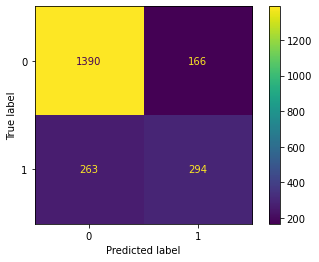

In [86]:
metrics.plot_confusion_matrix(log_reg,X_test,y_test)

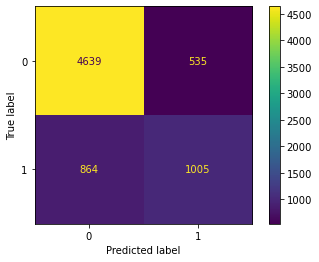

In [87]:
metrics.plot_confusion_matrix(log_reg,X_all,Y)

In [88]:
print("Decision Tree")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Decision Tree
Accuracy: 0.7950780880265026
Precision 0.6483253588516746
Recall 0.4865350089766607
f1_score 0.5558974358974359


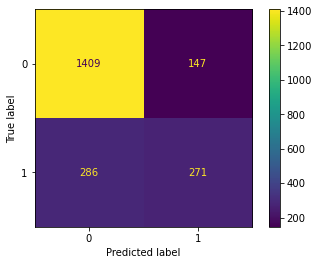

In [89]:
metrics.plot_confusion_matrix(dtree,X_test,y_test)

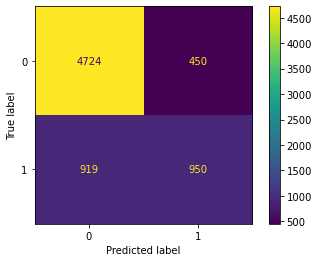

In [90]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [91]:
print("Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Random Forest
Accuracy: 0.7998106956933271
Precision 0.6700507614213198
Recall 0.473967684021544
f1_score 0.5552050473186119


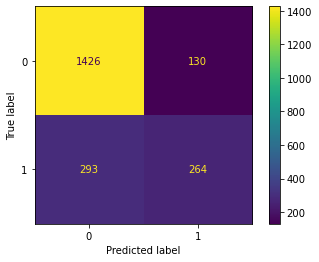

In [92]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

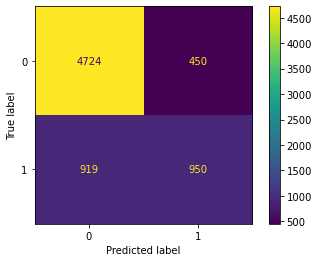

In [93]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [94]:
print("Gadient Bossting Classifier")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbc))
print("Precision",metrics.precision_score(y_test,y_pred_gbc))
print("Recall",metrics.recall_score(y_test,y_pred_gbc))
print("f1_score",metrics.f1_score(y_test,y_pred_gbc))

Gadient Bossting Classifier
Accuracy: 0.7998106956933271
Precision 0.6437768240343348
Recall 0.5385996409335727
f1_score 0.5865102639296188


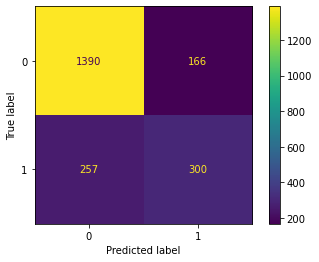

In [95]:
metrics.plot_confusion_matrix(gbc,X_test,y_test)

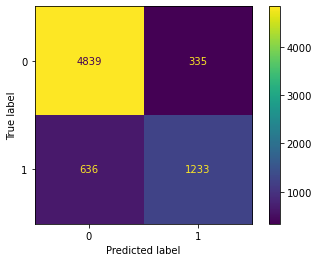

In [96]:
metrics.plot_confusion_matrix(gbc,X_all,Y)

In [97]:
print("Stacking Classifier")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacking))
print("Precision",metrics.precision_score(y_test,y_pred_stacking))
print("Recall",metrics.recall_score(y_test,y_pred_stacking))
print("f1_score",metrics.f1_score(y_test,y_pred_stacking))

Stacking Classifier
Accuracy: 0.7983909133932797
Precision 0.6519721577726219
Recall 0.5044883303411131
f1_score 0.5688259109311742


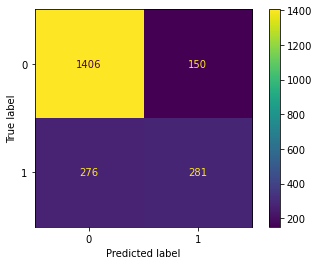

In [98]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

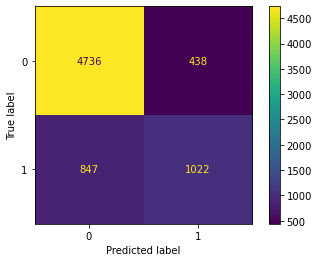

In [99]:
metrics.plot_confusion_matrix(clf,X_all,Y)

#### Lorenz Curve

In [100]:
y_pred_prob = log_reg.predict_proba(X_all)[:,1]

In [101]:
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1

In [102]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1


In [103]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1

In [104]:
y_pred_prob = gbc.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1

In [105]:
y_pred_prob = clf.predict_proba(X_all)[:, 1]
df['pred_prob_stacking']=pd.DataFrame(y_pred_prob)
df['P_Rank_stacking']=pd.qcut(df['pred_prob_stacking'].rank(method='first').values,10,duplicates='drop').codes+1


#### Conclusion: GBC model will be used for customer targeting

In [106]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,pred_prob_logreg,P_Rank_logreg,pred_prob_dtree,P_Rank_tree,pred_prob_rf,P_Rank_rf,pred_prob_gbm,P_Rank_GBM,pred_prob_stacking,P_Rank_stacking
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.595525,9,0.549550,9,0.568935,9,0.587046,9,0.628645,9
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0.054633,3,0.036011,3,0.104575,4,0.038507,3,0.084306,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.302084,7,0.232558,6,0.440122,8,0.559439,9,0.459603,8
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.021732,2,0.036011,3,0.094328,3,0.035985,3,0.080151,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.780543,10,0.470588,8,0.687384,10,0.627861,9,0.763895,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,0.083510,4,0.130081,4,0.129898,4,0.107568,5,0.100748,4
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,0.103770,4,0.000000,1,0.174226,5,0.044511,3,0.116956,5
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0.347913,7,0.100000,4,0.318001,7,0.151568,6,0.235010,7
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,0.662353,9,0.690909,10,0.604802,10,0.727280,10,0.699531,10


In [107]:
df['Tenure_Rank']=pd.qcut(df['tenure'].rank(method='first').values,10,duplicates='drop').codes+1

In [108]:
df.groupby('Tenure_Rank')['tenure'].agg(['min','max','mean'])

,min,max,mean
Tenure_Rank,,,
1,0,2,1.099291
2,2,6,3.566761
3,6,12,8.779830
4,12,20,15.531250
5,20,29,24.153191
6,29,40,34.004261
7,40,50,45.014205
8,50,60,55.370739
9,60,69,65.001420


In [109]:
df['tenure'].mean()

32.37114865824223

In [110]:
df['Tenure_Segment']=np.where(df['Tenure_Rank']<=6,"Low Tenure","High Tenure")

In [111]:
df['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10,duplicates='drop').codes+1

In [112]:
df.groupby('MonthlyCharges_Rank')['MonthlyCharges'].agg(['min','max','mean'])

,min,max,mean
MonthlyCharges_Rank,,,
1,18.25,20.05,19.622482
2,20.05,25.05,21.732599
3,25.05,45.85,35.514773
4,45.85,58.75,52.532244
5,58.85,70.35,65.314965
6,70.35,79.10,74.623864
7,79.10,85.50,82.140057
8,85.50,94.25,89.840199
9,94.25,102.60,98.036364


In [113]:
df['MonthlyCharges'].mean()

64.76169246059922

In [114]:
df['Monthly_Charge_Segment']=np.where(df['MonthlyCharges_Rank']<=5,"Low Charges","High Charges")


In [115]:
df['Predicted_Churn_Rank']=np.where(df['P_Rank_GBM']>=8,"Top 3","Bottom 7")

In [116]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,pred_prob_logreg,P_Rank_logreg,pred_prob_dtree,P_Rank_tree,pred_prob_rf,P_Rank_rf,pred_prob_gbm,P_Rank_GBM,pred_prob_stacking,P_Rank_stacking,Tenure_Rank,Tenure_Segment,MonthlyCharges_Rank,Monthly_Charge_Segment,Predicted_Churn_Rank
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.595525,9,0.549550,9,0.568935,9,0.587046,9,0.628645,9,1,Low Tenure,3,Low Charges,Top 3
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0.054633,3,0.036011,3,0.104575,4,0.038507,3,0.084306,3,6,Low Tenure,4,Low Charges,Bottom 7
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.302084,7,0.232558,6,0.440122,8,0.559439,9,0.459603,8,1,Low Tenure,4,Low Charges,Top 3
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.021732,2,0.036011,3,0.094328,3,0.035985,3,0.080151,3,7,High Tenure,3,Low Charges,Bottom 7
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.780543,10,0.470588,8,0.687384,10,0.627861,9,0.763895,10,1,Low Tenure,6,High Charges,Top 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,0.083510,4,0.130081,4,0.129898,4,0.107568,5,0.100748,4,5,Low Tenure,7,High Charges,Bottom 7
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,0.103770,4,0.000000,1,0.174226,5,0.044511,3,0.116956,5,10,High Tenure,10,High Charges,Bottom 7
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0.347913,7,0.100000,4,0.318001,7,0.151568,6,0.235010,7,3,Low Tenure,3,Low Charges,Bottom 7
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,0.662353,9,0.690909,10,0.604802,10,0.727280,10,0.699531,10,2,Low Tenure,6,High Charges,Top 3


In [117]:
df_top3=df.loc[df['Predicted_Churn_Rank']=='Top 3']

In [118]:
df_top3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,pred_prob_logreg,P_Rank_logreg,pred_prob_dtree,P_Rank_tree,pred_prob_rf,P_Rank_rf,pred_prob_gbm,P_Rank_GBM,pred_prob_stacking,P_Rank_stacking,Tenure_Rank,Tenure_Segment,MonthlyCharges_Rank,Monthly_Charge_Segment,Predicted_Churn_Rank
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.595525,9,0.549550,9,0.568935,9,0.587046,9,0.628645,9,1,Low Tenure,3,Low Charges,Top 3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.302084,7,0.232558,6,0.440122,8,0.559439,9,0.459603,8,1,Low Tenure,4,Low Charges,Top 3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.780543,10,0.470588,8,0.687384,10,0.627861,9,0.763895,10,1,Low Tenure,6,High Charges,Top 3
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,0.747163,10,0.672811,9,0.687657,10,0.909734,10,0.809324,10,3,Low Tenure,9,High Charges,Top 3
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,0.525749,8,0.672811,9,0.434633,8,0.481756,8,0.434240,8,5,Low Tenure,10,High Charges,Top 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,0,0.680295,10,0.366667,8,0.478871,8,0.590348,9,0.516691,9,3,Low Tenure,3,Low Charges,Top 3
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1,0.830309,10,0.884211,10,0.775675,10,0.912122,10,0.869912,10,1,Low Tenure,6,High Charges,Top 3
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,0,0.322142,7,0.315615,7,0.327783,7,0.395651,8,0.289851,7,6,Low Tenure,5,Low Charges,Top 3
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,0,0.567784,9,0.315615,7,0.400954,8,0.382425,8,0.369864,8,4,Low Tenure,6,High Charges,Top 3


In [119]:
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']
target=['target']

total=service_list+target

In [120]:
df_top3_services=df_top3[service_list]

In [121]:
df_top3_services

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes
5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes
8,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7029,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes
7032,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes
7033,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes
7035,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes


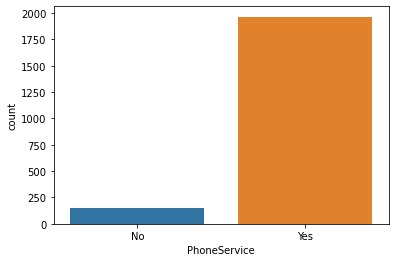

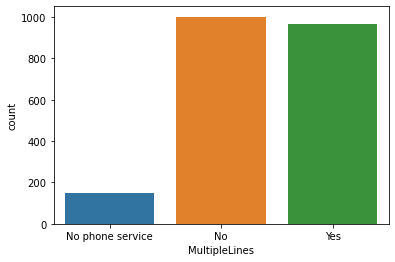

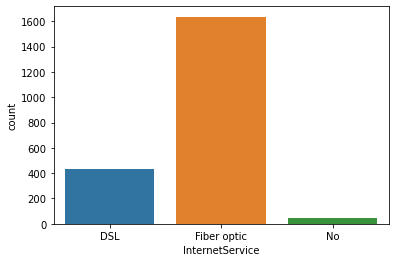

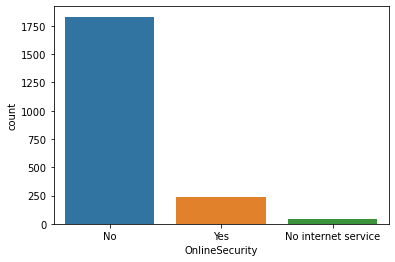

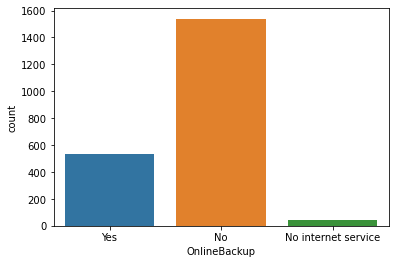

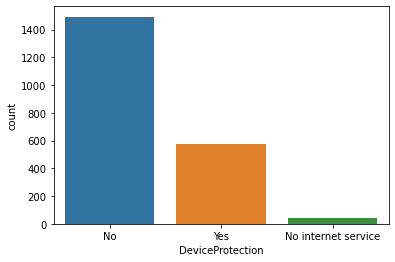

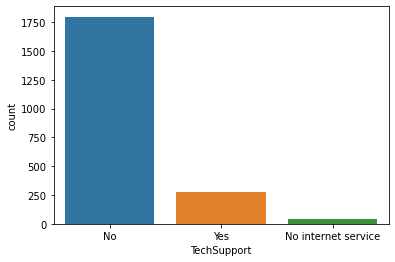

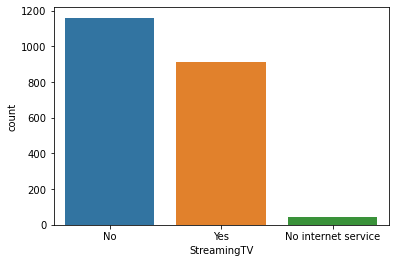

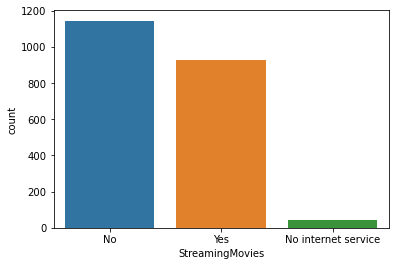

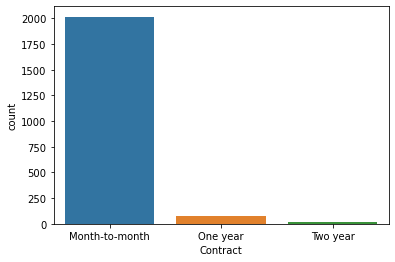

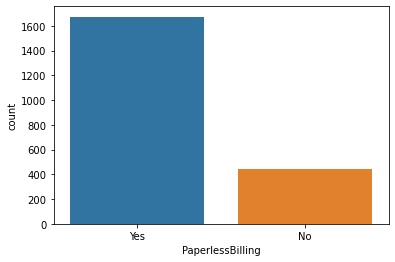

In [122]:
for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top3_services)
plt.show()

In [123]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['MonthlyCharges'],aggfunc='mean')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,99.832524,86.68772
Low Charges,47.358824,48.84717


In [124]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['target'],aggfunc='count')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,206,1307
Low Charges,17,583


In [125]:
# Recommendations
# Device Protection with Online Services
# Convert customer to DSL if they are facing challenges with Fiber Optics
# Offer discounts on Yearly contracts